In [1]:
import os
import json
import matplotlib.pyplot as plt

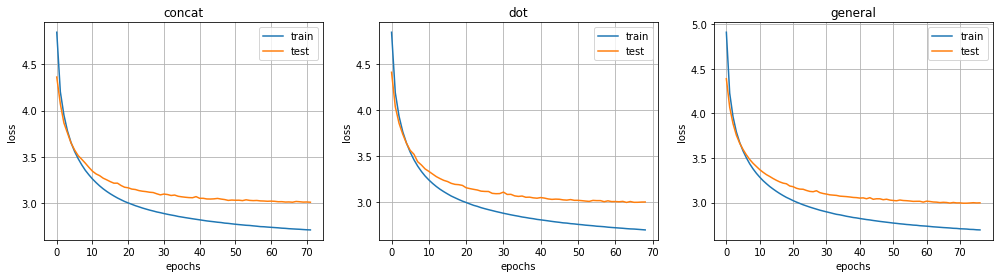

In [51]:
results = os.listdir('./models/')
logs = [elt for elt in results if 'logs' in elt]

fig = plt.figure(figsize=(17,4))

for idx, log in enumerate(logs):

    with open('./models/' + log, 'r') as file:
        tmp = json.load(file)

    losses = [v['loss'][0] for (k,v) in tmp.items() if 'epoch' in k]
    test_losses = [v['test_loss'][0] for (k,v) in tmp.items() if 'epoch' in k]
    assert len(losses) == len(test_losses)

    plt.subplot(1,3,idx+1)
    plt.plot(range(len(losses)), losses, label='train')
    plt.plot(range(len(test_losses)), test_losses, label='test')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title(log.split('_')[1])
    plt.grid(True)

plt.show()

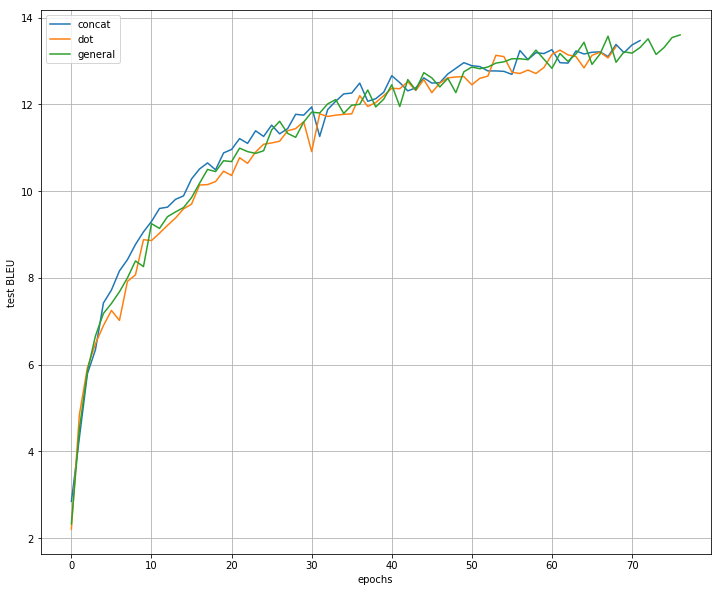

In [57]:
fig = plt.figure(figsize=(12,10))

for idx, log in enumerate(logs):

    with open('./models/' + log, 'r') as file:
        tmp = json.load(file)

    test_bleus = [v['test_BLEU'][0] for (k,v) in tmp.items() if 'epoch' in k]
    plt.plot(range(len(test_bleus)), test_bleus, label=log.split('_')[1])

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('test BLEU')
plt.grid(True)
plt.show()